In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

In [2]:
M1 = 1000
M2 = 1
R = 1
G = 1
r1 = -M2*R/(M1+M2)
r2 = M1*R/(M1+M2)
print(f'Mass of Star = {M1} units')
print(f'Mass of planet = {M2} units')

Mass of Star = 1000 units
Mass of planet = 1 units


In [3]:
omega = np.sqrt(G*(M1+M2)/R**3)
T = 2*np.pi/omega
print(f'Time Period of Revolution = {T:2.2e} units')

Time Period of Revolution = 1.99e-01 units


In [4]:
def accel(pos, vel):
    """
        Returns the acceleration given the position and velocity of the particle
    """
    position = np.array(pos); velocity = np.array(vel)
    d1 = position - np.array([r1, 0])
    d2 = position - np.array([r2, 0])
    a1 = -G*M1*d1/np.linalg.norm(d1)**3
    a2 = -G*M2*d2/np.linalg.norm(d2)**3
    a_centrifugal = omega**2*position
    a_coriolis = -2*np.cross([0,0,omega], np.append(velocity, 0))
    
    if np.linalg.norm(d1)>0.00001 and np.linalg.norm(d2)>0.000001:
        return np.sum([a1, a2, a_centrifugal, a_coriolis[:-1]], axis=0)
    else:
        return np.array([np.nan, np.nan])

In [5]:
def phase_accel(t, phase):
    x = phase[:2]
    v = phase[2:]
    a = accel(x,v)
    if np.any(np.isnan(a)):
        return np.array([0,0,0,0])
    else:
        return np.append(v, a)

In [6]:
def iteration(x, y, vx, vy):
    init_phase = np.array([x, y, vx, vy])
    sol = solve_ivp(fun=phase_accel, t_span=(0,500*T), y0=init_phase, t_eval=np.arange(50*T,500*T, 0.001))
    t = sol.t
    phase = sol.y
    return t, phase[0], phase[1]

In [10]:
x = r2-R/2 + 0.02
y = 3**0.5/2*R 
vx =0#np.random.random()
vy = 0#.1*np.sqrt(G*(M1+M2)/np.abs(x))#np.random.random()

In [11]:
start = time.time()
t, xf, yf = iteration(x, y, vx, vy)
stop = time.time()
print(f"Well, this little maneuver's gonna cost us {stop-start:2.2f} seconds")

Well, this little maneuver's gonna cost us 3.48 seconds


In [28]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

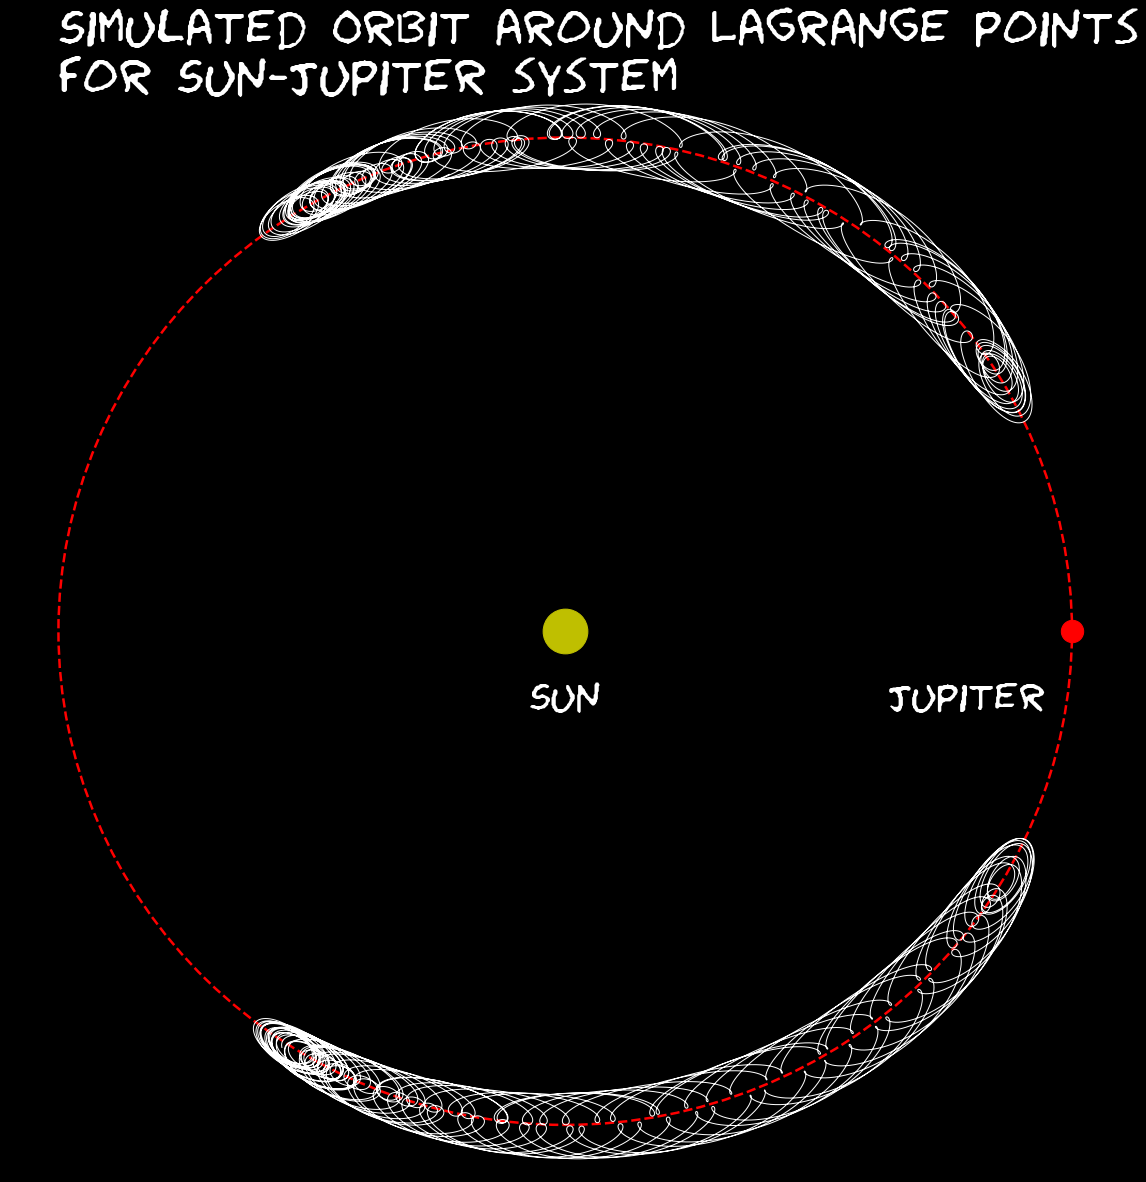

In [36]:
plt.style.use('dark_background')
# plt.xkcd()
plt.figure(figsize=(20,20))
plt.plot(xf[:20000], yf[:20000], label=f'x = {x}\ny={y}\nvx={vx}\nvy={vy}', lw=1, color='w')
plt.plot(xf1[:20000], yf1[:20000], label=f'x = {x}\ny={y}\nvx={vx}\nvy={vy}', lw=1, color='w')
circ1 = plt.Circle((0,0), r2, color='r', fc='k', zorder=0, linestyle='--', linewidth=2.5)
ax = plt.gca()
ax.add_artist(circ1)
plt.scatter([r1], [0], s=2000, color='y', label=f'Star ({M1})')
plt.text(r1, -0.15, 'Sun', fontdict={'size':40, 'name':'Humor Sans'}, ha='center')
plt.text(r2-0.05, -0.15, 'Jupiter', fontdict={'size':40, 'name':'Humor Sans'}, ha='right')
plt.scatter([r2], [0], s=500, color='r', label=f'Planet ({M2})')
# plt.scatter(x, y, color='r', s=100)
# ax = plt.gca()
# ax.get_xaxis().set_visible('False')
plt.axis('off')
# plt.legend()
plt.xlim(-R-0.1, R+0.1)
plt.ylim(-R-0.1, R+0.1)
plt.text(-1,1.1,'Simulated Orbit around Lagrange points\nfor Sun-Jupiter system', fontdict={'color':'white', 'size':50, 'weight':'bold', 'name':'Humor Sans'})
plt.savefig('Briefing.png')

In [ ]:
plt.plot(t, np.sqrt(xf**2+yf**2))
plt